In [55]:
import re
import os
import matplotlib.pyplot as plt

record_dir = "record_1128_1344"  # 你的文件夹路径
pattern = re.compile(r'History tower damages\(coin <= 50\): (\[.*?\]); Total damage: ([\d\.Ee+-]+)')

all_damages = []  # 存储所有数组
all_total_damages = []  # 存储所有总伤害

for fname in os.listdir(record_dir):
    if fname.endswith(".record"):
        path = os.path.join(record_dir, fname)
        with open(path, encoding="utf-8") as f:
            for line in f:
                m = pattern.search(line)
                if m:
                    damages = eval(m.group(1))
                    total_damage = float(m.group(2))
                    print(sorted(damages, reverse=True)[:10])
                    print(f"Total damage: {total_damage}, ratio = {total_damage/max(damages):.2f}")
                    all_damages.append(damages)
                    all_total_damages.append(total_damage)
                    print(f"{fname}: {len(damages)} values")


[397441.7319465005, 230473.07387999963, 230473.07387999963, 227089.37700450065, 227089.37700450065, 227089.37700450065, 220209.61833899948, 209463.4359000002, 188526.1434390002, 188396.37129599956]
Total damage: 1506227.3847674995, ratio = 3.79
1128_1346_game_115.record: 262 values
[300950.615349999, 256642.62855000043, 253235.55949999875, 240890.5845499992, 240890.5845499992, 179811.57425000056, 173037.27595000056, 173037.27595000056, 162592.35299999962, 162592.35299999962]
Total damage: 1331100.4379719987, ratio = 4.42
1128_1346_game_115.record: 242 values
[342471.0601562496, 342471.0601562496, 329560.90634519706, 306441.5416044563, 273004.73359375156, 270691.1406563082, 270592.33010816027, 269893.1296340857, 269893.1296340857, 269893.1296340857]
Total damage: 1666969.507519531, ratio = 4.87
1128_1346_game_115.record: 224 values
[360413.4985649994, 318628.8758249986, 315482.4287999989, 295983.0603224988, 295204.32929250045, 290366.16839999927, 289749.21359999944, 288364.78440000035, 

In [46]:
# # 展示原始分布、以1.008为底对数分布、累计曲线（原始+对数）
# import numpy as np
# import matplotlib.pyplot as plt

# if all_damages:
#     arr = np.array(all_damages[0])
#     log_base = 1.008
#     arr_log = np.log(arr + 1) / np.log(log_base)  # 以1.008为底的对数处理

#     fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#     # 1. 原始分布
#     axs[0, 0].plot(arr, marker='o')
#     axs[0, 0].set_title('Tower Estimated Values (Original)')
#     axs[0, 0].set_xlabel('Tower Index')
#     axs[0, 0].set_ylabel('Estimated Value')
#     axs[0, 0].grid(True)

#     # 2. 对数分布（以1.008为底）
#     axs[0, 1].plot(arr_log, marker='o', color='orange')
#     axs[0, 1].set_title('Tower Estimated Values (log base 1.008)')
#     axs[0, 1].set_xlabel('Tower Index')
#     axs[0, 1].set_ylabel('log1.008(1 + Estimated Value)')
#     axs[0, 1].grid(True)

#     # 3. 原始累计曲线
#     arr_sorted = np.sort(arr)[::-1]
#     cumsum = np.cumsum(arr_sorted)
#     total = cumsum[-1]
#     ps = np.linspace(0, 1, len(arr_sorted)+1)
#     values = np.concatenate([[0], cumsum / total])
#     axs[1, 0].plot(ps*100, values, marker='o')
#     axs[1, 0].set_title('Cumulative Value Curve (Original)')
#     axs[1, 0].set_xlabel('Top p% Towers')
#     axs[1, 0].set_ylabel('Cumulative Value Ratio')
#     axs[1, 0].grid(True)

#     # 4. 对数累计曲线（以1.008为底）
#     arr_log_sorted = np.sort(arr_log)[::-1]
#     cumsum_log = np.cumsum(arr_log_sorted)
#     total_log = cumsum_log[-1]
#     ps_log = np.linspace(0, 1, len(arr_log_sorted)+1)
#     values_log = np.concatenate([[0], cumsum_log / total_log])
#     axs[1, 1].plot(ps_log*100, values_log, marker='o', color='orange')
#     axs[1, 1].set_title('Cumulative Value Curve (log base 1.008)')
#     axs[1, 1].set_xlabel('Top p% Towers')
#     axs[1, 1].set_ylabel('Cumulative Value Ratio (log1.008)')
#     axs[1, 1].grid(True)

#     plt.tight_layout()
#     plt.show()

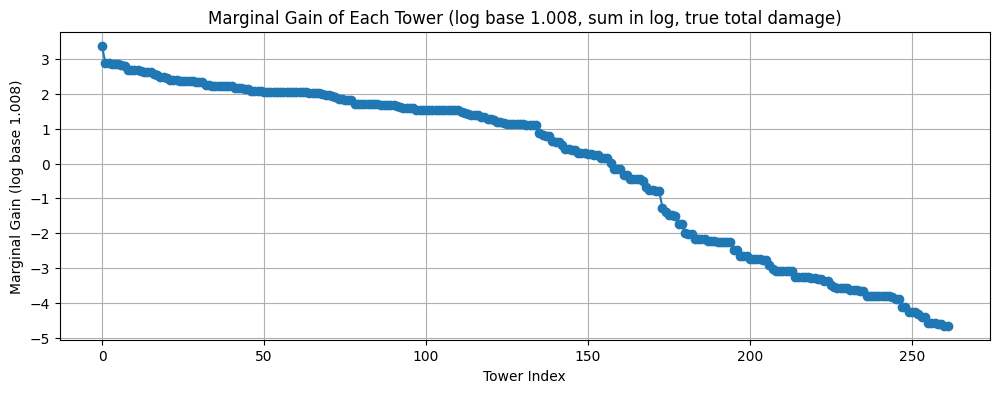

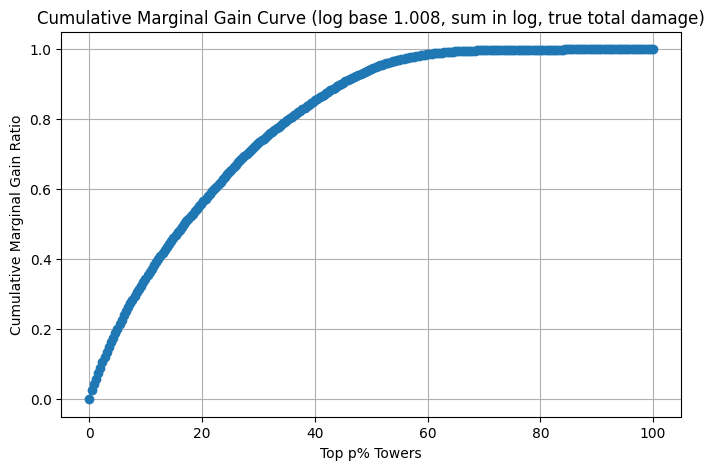

In [57]:
# 计算每座塔的边际收益（log1.008），得分为log(所有塔的估值之和)，base_score和curr_score都在log里，base_sum用真实总伤害
import numpy as np
import matplotlib.pyplot as plt

if all_damages and all_total_damages:
    arr = np.array(all_damages[0])
    log_base = 1.008
    base_sum = all_total_damages[0]  # 用真实总伤害
    marginal_gains = []
    for i in range(len(arr)):
        curr_sum = base_sum + arr[i]
        prev_score = np.log(base_sum + 1) / np.log(log_base)
        curr_score = np.log(curr_sum + 1) / np.log(log_base)
        marginal_gains.append(curr_score - prev_score)
    marginal_gains = sorted(marginal_gains, reverse=True)
    marginal_gains = np.array(marginal_gains)

    # 可视化分布
    plt.figure(figsize=(12,4))
    plt.plot(np.log(marginal_gains), marker='o')
    plt.xlabel('Tower Index')
    plt.ylabel('Marginal Gain (log base 1.008)')
    plt.title('Marginal Gain of Each Tower (log base 1.008, sum in log, true total damage)')
    plt.grid(True)
    plt.show()

    # 累积曲线
    sorted_gains = np.sort(marginal_gains)[::-1]
    cumsum_gains = np.cumsum(sorted_gains)
    total_gains = cumsum_gains[-1]
    ps = np.linspace(0, 1, len(sorted_gains)+1)
    values = np.concatenate([[0], cumsum_gains / total_gains])
    plt.figure(figsize=(8,5))
    plt.plot(ps*100, values, marker='o')
    plt.xlabel('Top p% Towers')
    plt.ylabel('Cumulative Marginal Gain Ratio')
    plt.title('Cumulative Marginal Gain Curve (log base 1.008, sum in log, true total damage)')
    plt.grid(True)
    plt.show()

Record 1:
   0%~10%: 0.4207
  10%~20%: 0.2507
  20%~30%: 0.1646
  30%~40%: 0.0979
  40%~50%: 0.0426
  50%~60%: 0.0128
  60%~70%: 0.0054
  70%~80%: 0.0028
  80%~90%: 0.0016
  90%~100%: 0.0009
Record 2:
   0%~10%: 0.3138
  10%~20%: 0.2224
  20%~30%: 0.1628
  30%~40%: 0.1243
  40%~50%: 0.0926
  50%~60%: 0.0604
  60%~70%: 0.0192
  70%~80%: 0.0025
  80%~90%: 0.0012
  90%~100%: 0.0006
Record 3:
   0%~10%: 0.4642
  10%~20%: 0.2564
  20%~30%: 0.1688
  30%~40%: 0.0863
  40%~50%: 0.0087
  50%~60%: 0.0055
  60%~70%: 0.0047
  70%~80%: 0.0037
  80%~90%: 0.0016
  90%~100%: 0.0001
Record 4:
   0%~10%: 0.4599
  10%~20%: 0.2754
  20%~30%: 0.1744
  30%~40%: 0.0650
  40%~50%: 0.0139
  50%~60%: 0.0059
  60%~70%: 0.0033
  70%~80%: 0.0018
  80%~90%: 0.0004
  90%~100%: 0.0000
Record 5:
   0%~10%: 0.2963
  10%~20%: 0.2483
  20%~30%: 0.2021
  30%~40%: 0.1349
  40%~50%: 0.0619
  50%~60%: 0.0359
  60%~70%: 0.0137
  70%~80%: 0.0047
  80%~90%: 0.0016
  90%~100%: 0.0006
Record 6:
   0%~10%: 0.4216
  10%~20%: 0.2689

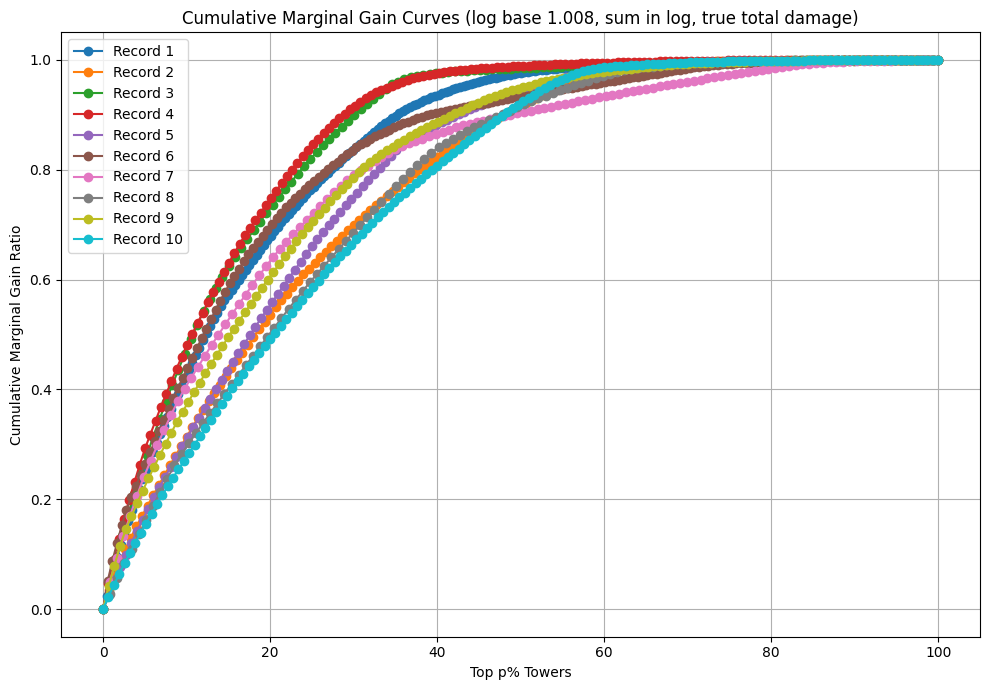

In [42]:
# 批量绘制前100个数组的边际收益累积曲线（log base 1.008, sum in log），并打印每10%分位点的贡献
import numpy as np
import matplotlib.pyplot as plt

log_base = 1.008
num_cells = min(10, len(all_damages), len(all_total_damages))
plt.figure(figsize=(10, 7))
for idx in range(num_cells):
    arr = np.array(all_damages[idx])
    base_sum = all_total_damages[idx]
    marginal_gains = []
    for i in range(len(arr)):
        curr_sum = base_sum + arr[i]
        prev_score = np.log(base_sum + 1) / np.log(log_base)
        curr_score = np.log(curr_sum + 1) / np.log(log_base)
        marginal_gains.append(curr_score - prev_score)
    marginal_gains = np.array(marginal_gains)
    sorted_gains = np.sort(marginal_gains)[::-1]
    cumsum_gains = np.cumsum(sorted_gains)
    total_gains = cumsum_gains[-1]
    ps = np.linspace(0, 1, len(sorted_gains)+1)
    values = np.concatenate([[0], cumsum_gains / total_gains])
    plt.plot(ps*100, values, marker='o', label=f'Record {idx+1}')
    # 打印每10%分位点的贡献
    print(f'Record {idx+1}:')
    for p in range(1, 11):
        start = int(len(sorted_gains) * (p-1) / 10)
        end = int(len(sorted_gains) * p / 10)
        contrib = sorted_gains[start:end].sum() / total_gains if end > start else 0.0
        print(f'  {((p-1)*10):2d}%~{(p*10):2d}%: {contrib:.4f}')

plt.xlabel('Top p% Towers')
plt.ylabel('Cumulative Marginal Gain Ratio')
plt.title('Cumulative Marginal Gain Curves (log base 1.008, sum in log, true total damage)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()